# Notebook 1: Generating the neutral hydrogen map

The following code generates a hydrogen map from theory:

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from meer21cm import MockSimulation
from meer21cm.plot import plot_map

In [29]:
mock = MockSimulation(
    survey='meerklass_2021',
    band='L',
    ra_range=(334, 357),
    dec_range=(-35, -26.5),
    flat_sky=True,
    seed=42,
)


This gives you a survey area and the frequency range. This is the survey area:

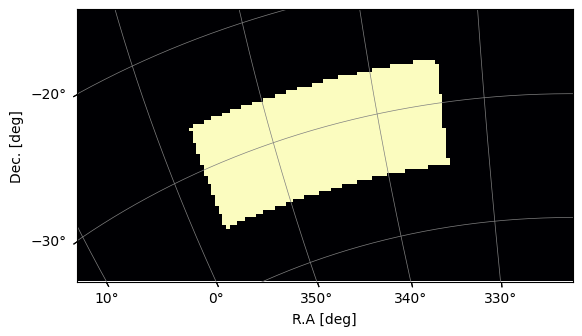

In [30]:
plot_map(mock.W_HI, mock.wproj, have_cbar=False)

And the frequency range gives you the cosmological redshifts:

Text(0, 0.5, 'Redshift')

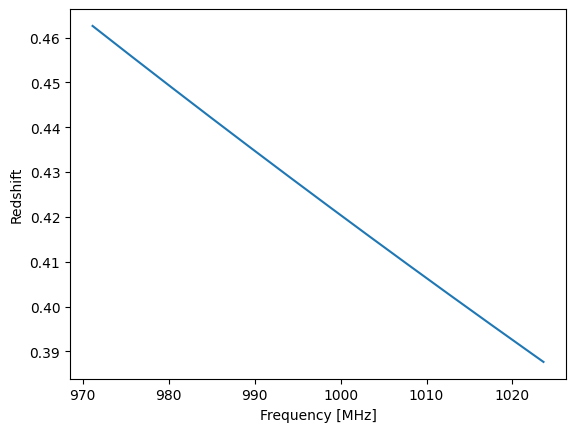

In [31]:
plt.plot(mock.nu/1e6, mock.z_ch)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Redshift')

And let us define some input model for the cosmological neutral hydrogen distribution:

In [32]:
mock.omega_hi = 5e-4 # neutral hydrogen fraction
mock.mean_amp_1 = 'average_hi_temp'
mock.tracer_bias_1 = 1.0 # bias of the neutral hydrogen distribution relative to the dark matter distribution


In [33]:
mock.data = mock.propagate_mock_field_to_data(mock.mock_tracer_field_1)

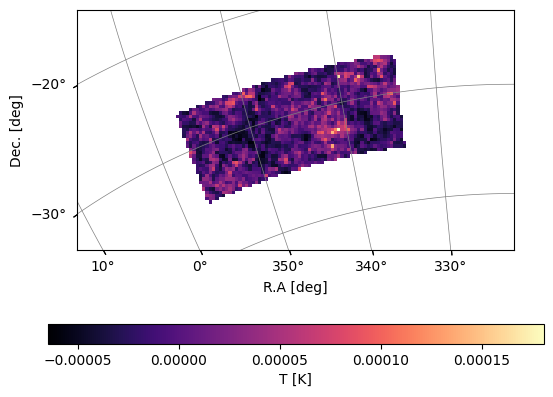

In [34]:
plot_map(mock.data, mock.wproj, W=mock.W_HI,have_cbar=True,cbar_label='T [K]')

Note that, this does not reflect the real observation. A real observation would include the telescope beam smoothing, foreground contamination, thermal noise and more potential systematics. For now, let us keep it simple and stick to just a 21cm signal.

## Power Spectrum
What we want to extract from the map is the power spectrum. It tells us how matter distributes in the Universe. From a theory perspective, the power spectrum is a function of ($k_\perp$, $k_\parallel$) 

In [35]:
mock.grid_data_to_field();

In [36]:
mock.kparabins = np.linspace(0, 1, 11)
mock.kperpbins = np.linspace(0, 0.5, 21)
power_cy,_ = mock.get_cy_power(mock.auto_power_3d_1)

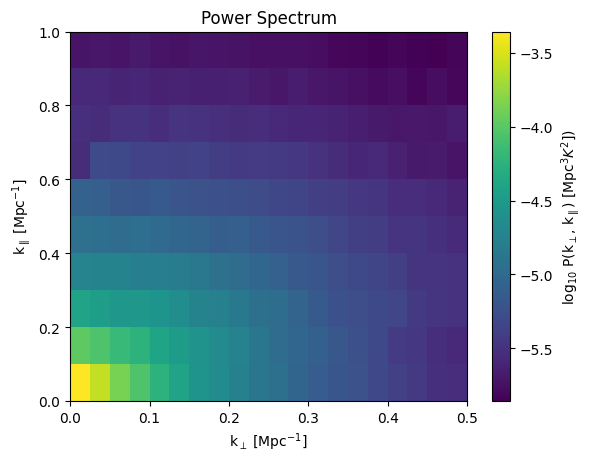

In [37]:
plt.pcolormesh(mock.kperpbins, mock.kparabins, np.log10(power_cy.T))
cbar = plt.colorbar()
cbar.set_label(r'log$_{10}$ P(k$_\perp$, k$_\parallel$) [${\rm Mpc}^{3}K^2]$)')
plt.xlabel('k$_\perp$ [Mpc$^{-1}$]')
plt.ylabel('k$_\parallel$ [Mpc$^{-1}$]')
plt.title('Power Spectrum')
plt.show()


In practice, we average the power spectrum into a 1D spectrum:

In [38]:
mock.k1dbins = np.linspace(0, 1.2, 21)
power_1d,k_1d,nmodes_1d = mock.get_1d_power(mock.auto_power_3d_1)

And let us compare with the input theory:

In [39]:
power_model,_,_ = mock.get_1d_power(mock.auto_power_tracer_1_model)


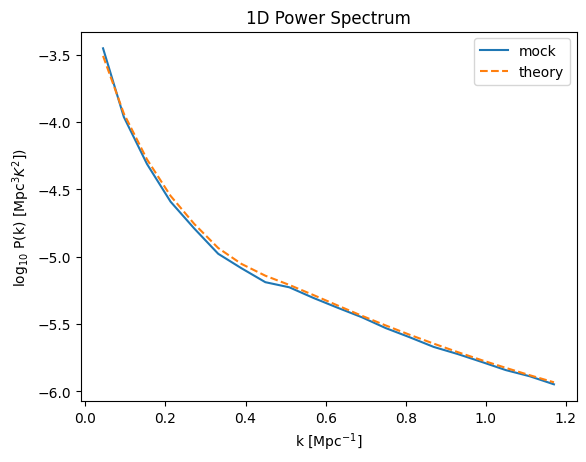

In [41]:
plt.plot(k_1d, np.log10(power_1d.T),label='mock')
plt.plot(k_1d, np.log10(power_model.T),label='theory',ls='--')
plt.xlabel('k [Mpc$^{-1}$]')
plt.ylabel(r'log$_{10}$ P(k) [${\rm Mpc}^{3}K^2]$)')
plt.title('1D Power Spectrum')
plt.legend()
plt.show()



Task for you: If you go back to the beginning of the notebook, you can see that I specify `seed=42`. This is to say we use a fixed seed for random number generation, which gives you **one realization** of the mock. In order to put error bars on the blue line above, we need to change this seed to run multiple realizations. Organise the code snippets above into a function, that takes seed number as an input. Run 100 realisations and take the standard deviation of the 100 realizations as the error bar. Try it first yourself, don't worry if you can't finish it in time and we can go through this next week.